# Examples from the Detection class

The detection class includes all non-unique observations of objects by LSST within a given time range. This time range is specified when the class is instantiated.

In [1]:
import sys

sys.path.append("../Source")

### Detection class

In [2]:
#import the Detection class from the detection module

from detections import Detections

The class is instantiated using:

Detections(

    start_time, # ISO or MJD format is accepted
    end_time
)

In [3]:
# Instantiate the class for the time frame 60043 to 60044, this can be specified
# in ISO format, start_time = "2023-04-09", end_time = "2023-04-16"

det = Detections(start_time = 60043, end_time = 60050)
# times can also be specified in ISO format

### Detections visualised by their heliocentric distances

#### Scatter plot of detections

A heliocentric Birds Eye Plot of object detections can be called using the heliocentric_view method. The function takes the following parameters;

heliocentric_view(

        min_hd : float = None, # minimun heliocentric distance
        
        max_hd : float = None, # maximum heliocentric distance
        
        filters: Optional[list] = None, # ['g','r','i','z','y','u']
        
        title : Optional[str] = None, # title of the plot
        
        projection: Optional[Literal['2d', '3d']] = '2d',
        
        cache_data: Optional[bool] = False, # keep the data associated with the plot
    )
    
This returns a ScatterPlot object

CPU times: user 788 ms, sys: 166 ms, total: 953 ms
Wall time: 2min 16s


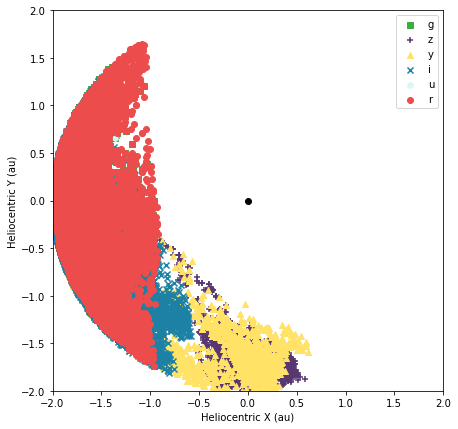

In [4]:
%%time

helio_view = det.heliocentric_view(
    min_hd = 0,
    max_hd = 2,
    filters = ["r", "g", "i", "z", "y", "u"],
    #projection = "3d",
    cache_data = True
)

A helpful utility function to create filter plots individually is given in by single_heliocentric_plots. This returns a list of ScatterPlot objects.

single_heliocentric_plots(

        min_hd,
        
        max_hd,
        
        filters: Optional[list] = None,
        
        cache_data: Optional[bool] = False,
    )

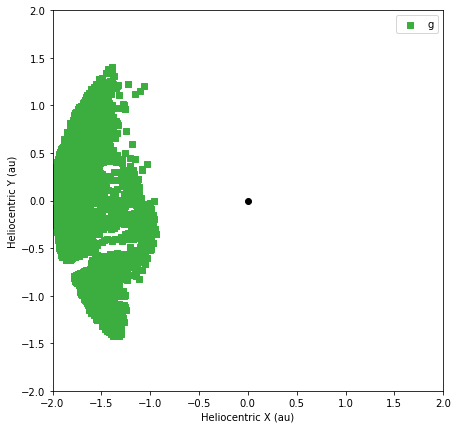

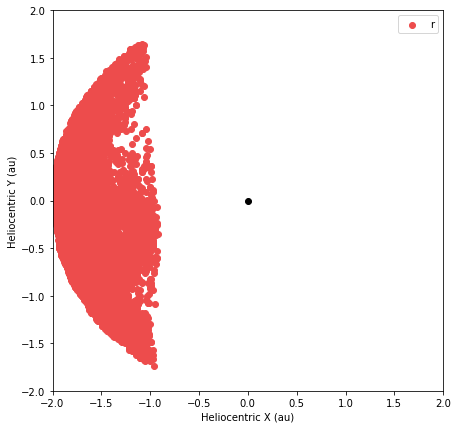

In [5]:
det.single_heliocentric_plots(
    filters = ['g', 'r'],
    min_hd = 0,
    max_hd = 2
)

#### 2D Histogram

The heliocentric histogram method allows the density of objects to be visualised as a function of heliocentric distance. 

heliocentric_histogram(

        min_hd : float = None,
        max_hd : float = None,
        title : Optional[str] = None,
        marginals: Optional[bool] = False, # specifies if user wants charts on axes
        cache_data: Optional[bool] = False
)

Returns a Histogram2D plot object

<Figure size 432x288 with 0 Axes>

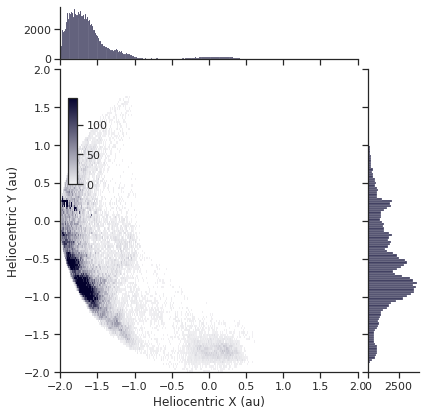

In [6]:
helio_hist = det.heliocentric_histogram(
    min_hd = 0,
    max_hd = 2,
    cache_data = True,
    marginals = True
)

#### Hex Plot

The heliocentric_hexplot method provides similiar functionality to the heliocentric_histogram
but with a different stylistic view using color mapped hexagons to indicate density of detections.

heliocentric_hexplot(

        min_hd : float = None,
        max_hd : float = None,
        title : Optional[str] = None,
        marginals: Optional[bool] = False,
        library: Optional[str] =  "seaborn",
        cache_data: Optional[bool] = False,  
    ):

<Figure size 432x288 with 0 Axes>

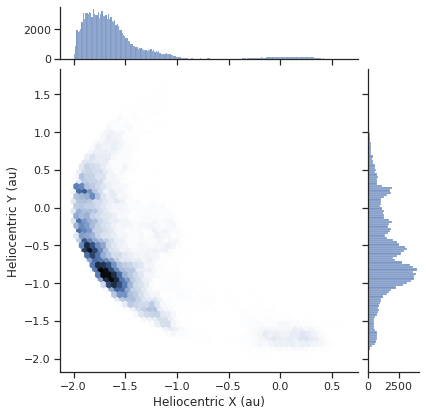

In [7]:
helio_hist = det.heliocentric_hexplot(
    min_hd = 0,
    max_hd = 2,
    cache_data = True,
)
#fix colorbar

### Detections visualised by their topocentric distances

#### Scatter plots

The topocentric_view method provides the similiar functionality to the heliocentric view but using topocentric distances. The following topocentric methods from the above heliocentric methods.


topocentric_view(

    min_hd : float = None,
    max_hd : float = None,
    filters: Optional[list] = None,
    title : Optional[str] = None,
    projection: Optional[Literal['2d', '3d']] = '2d',
    library: Optional[str] =  "seaborn",
    cache_data: Optional[bool] = False,
    ): -> ScatterPlot

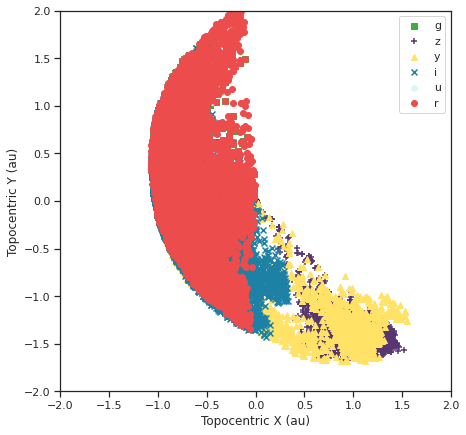

In [8]:
topo_view = det.topocentric_view(
    min_hd = 0,
    max_hd = 2,
    filters = ["r", "g", "i", "z", "y", "u"],
    #projection = "3d",
    cache_data = True
)

single_topocentric_plots(

        filters: Optional[list] = None,
        cache_data: Optional[bool] = False,
    ): -> List[ScatterPlot]
    
    
    

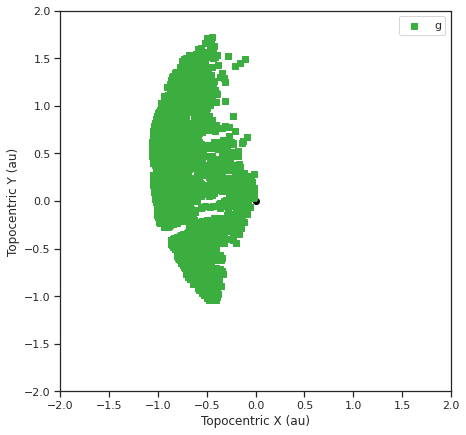

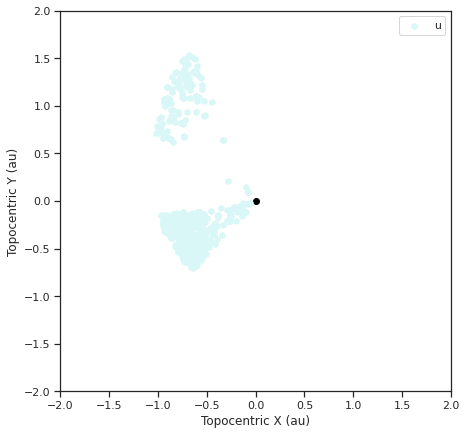

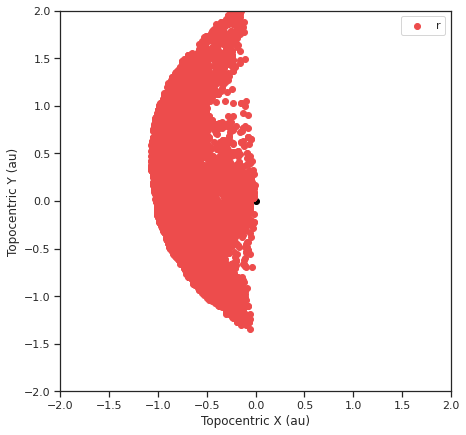

In [9]:
det.single_topocentric_plots(
    filters = ['g', 'r', 'u'],
    min_hd = 0,
    max_hd = 2
)

#### 2D Histogram

<Figure size 432x288 with 0 Axes>

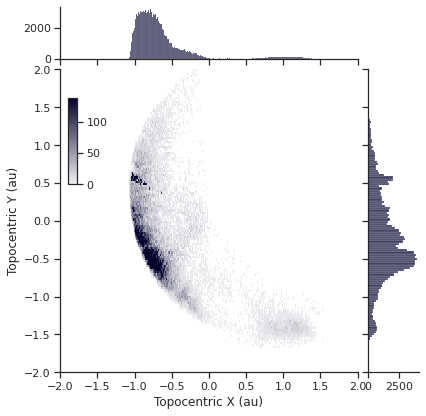

In [10]:
topo_hist = det.topocentric_histogram(
    min_hd = 0,
    max_hd = 2,
    #cache_data = True,
    marginals = True
)

#### Hex Plot

<Figure size 432x288 with 0 Axes>

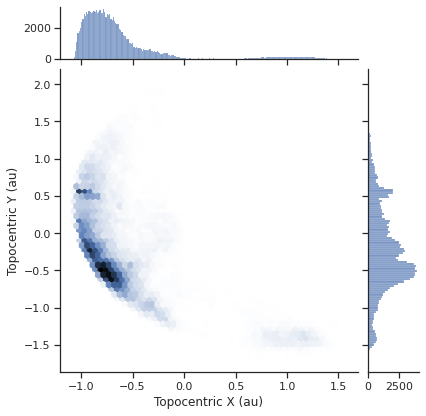

In [11]:
topo_hex = det.topocentric_hexplot(
    min_hd = 0,
    max_hd = 2,
    #projection = "3d",
    cache_data = True
)

### Visualising orbital distributions for LSST detections

#### Boxen Plots

orbital_distributions(

        parameter : Literal["e", "incl", "q", "a"],
        filters: Optional[list] = None,
        plot_type: Literal["BOX", "VIOLIN", "BOXEN"] = 'BOX',
        title : Optional[str] = None,
        cache_data: Optional[bool] = False,
        **orbital_elements
    ):
**orbital_elements are the following specified key word arguments;

    + min_a / max_a - semi-major axis
    + min_incl / max_incl - inclination
    + min_q / max_q - perihelion
    + min_e / max_e - eccentricity
    


#### Boxen

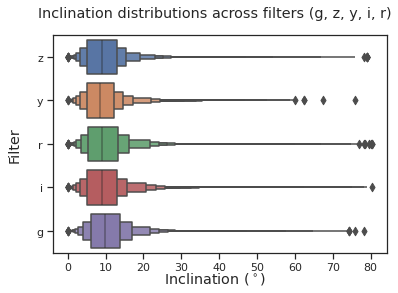

In [12]:
x = det.orbital_distributions(
    parameter = "incl",
    filters = ["r", "g", "i", "z", "y"],
    plot_type = "boxen",
    max_a = 10
)

#### Box (default)

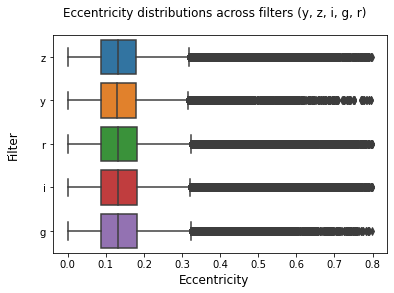

In [4]:
x = det.orbital_distributions(
    parameter = "e",
    filters = ["r", "g", "i", "z", "y"],
    plot_type = "box",
    max_e = 0.8
)

#### Violin

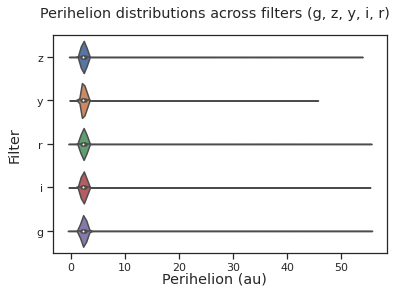

In [14]:
x = det.orbital_distributions(
    parameter = "q",
    filters = ["r", "g", "i", "z", "y"],
    plot_type = "violin",
    min_q = 1,
    max_q = 3
)

all_orbital_distributions provides the same functionality as the individual plots but requires only one call. It returns a list of respective plot classes i.e. BoxPlot, BoxenPlot or ViolinPlot 

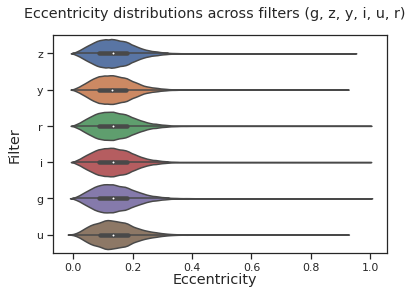

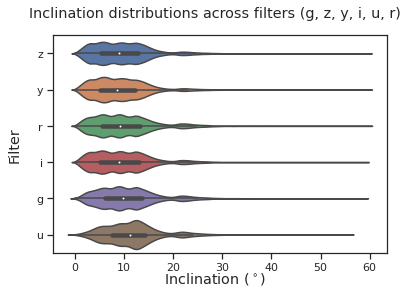

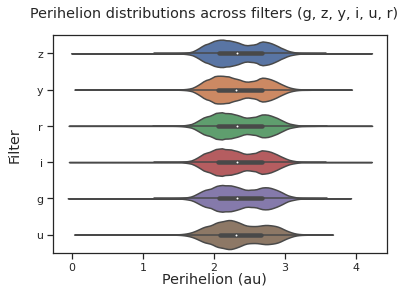

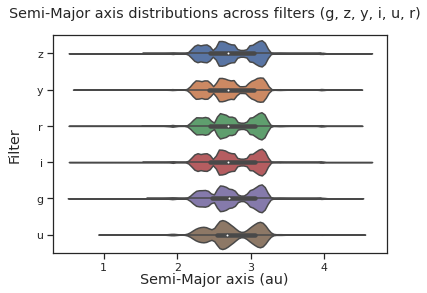

In [15]:
x = det.all_orbital_distributions(
    filters = ["r", "g", "i", "y", "z", "u"],
    max_q = 10,
    max_a = 5,
    max_e = 0.5,
    max_incl = 60,
    plot_type = "violin"
)

### Relations between orbital parameters of detections

Relational comparison between orbital parameters can be made using the orbital_relations_hexplot, orbital_relations_histogram and orbital_relations_scatter functions

<Figure size 432x288 with 0 Axes>

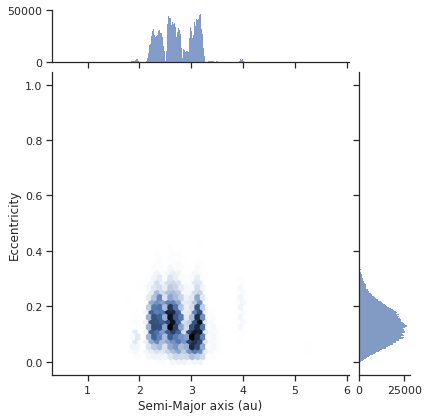

In [16]:
example = det.orbital_relations_hexplot(
    x = "a",
    y = "e",
    min_a = 0,
    max_a = 6,
)

<Figure size 432x288 with 0 Axes>

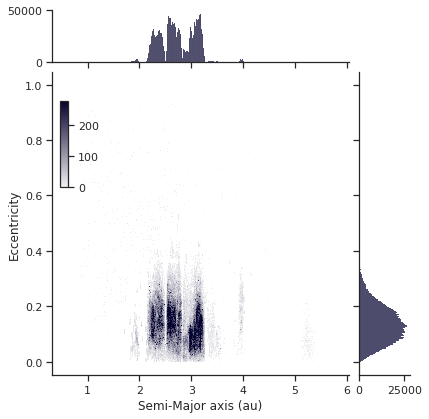

In [17]:
det.orbital_relations_histogram(
    x = "a",
    y = "e",
    min_a = 0,
    max_a = 6,
    min_e = 0,
    marginals = True
)

### Detection distributions 

The detection distributions method allows the total number of detections across days, months or years to be visualised using a one dimensional histogram.

detection_distributions(

        title : Optional[str] = None,
        timeframe : Literal["daily", "monthly", "yearly"] = "daily",
        time_format: Optional[Literal['ISO', 'MJD']] = 'ISO',
        cache_data: Optional[bool] = False,
        **orbital_elements
    ):
    
    **orbital_elements includes; min_a/max_a, min_incl/max_incl, min_q/max_q and min_e/max_e

CPU times: user 11 s, sys: 466 ms, total: 11.5 s
Wall time: 37.9 s


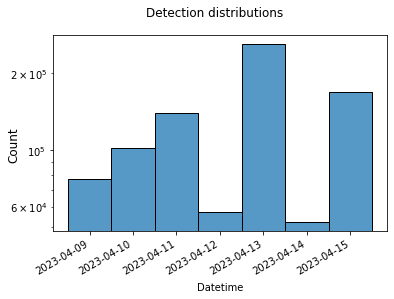

In [4]:
%%time
dect_dist = det.detection_distributions(
    timeframe = "daily"
)

####  Daily detection distributions

Daily detection distributions provides means to visualise object detection counts across populations. This method is a wrapper over code written for the in the previous functional style code. 

daily_detection_distributions(

        DistanceMinMax=[[0,2],[2,6],[6,25],[25,100]]
        
): -> returns BarPlot

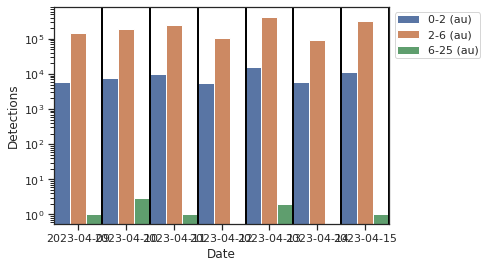

In [19]:
%%time
y = det.daily_detection_distributions(
    DistanceMinMax=[[0,2],[2,6],[6,25]]
)

#### Monthly and yearly detection distributions

monthly_detection_distribution and yearly_detection_distribution provide wrappers over the previous functional code but now returns HistogramPlot objects. These are kept separate from the class due to the difference in timescales that the Detection class aims to provide for. Warning these functions take some time to load.

monthly_detection_distribution(

    date=60042, # provided in MJD format
    day=None,
    month=None,
    year=None,
    title='', 
    filename=None,
    DateInterval = 2, # number of months included in the plot
    DistanceMinMax=[[80, 81]], # population distances
    cache_data : Optional[bool] = True
)


yearly_detection_distribution(

    date=None, # provided in MJD format
    day=None,
    month=None,
    year=None,
    title='', 
    filename = None,
    DateInterval = 8, # number of years included in the plot
    DistanceMinMax=[[80,81]], # Population distances
    cache_data: Optional[bool] = True
):


In [5]:
from detections import monthly_detection_distribution

from detections import yearly_detection_distribution

CPU times: user 433 ms, sys: 89.9 ms, total: 523 ms
Wall time: 1h 16min 51s


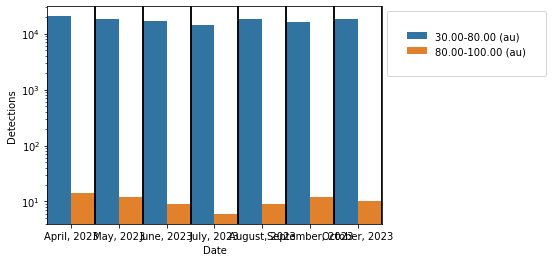

In [6]:

%%time
month_dect = monthly_detection_distribution(
    date = 60042,
    DateInterval = 7,
    DistanceMinMax = [[30, 80], [80,100]],
    cache_data = False
)


In [ ]:
'''
%%time 
year_dect = yearly_detection_distribution(
    date = 60042,
    DateInterval = 5,
    DistanceMinMax = [[30,80],[80,100]],
    cache_data = False
)
'''